# Matemática para Ciencia de los Datos
# Trabajo Práctico 4

Profesor: Luis Alexánder Calvo Valverde 

Instituto Tecnológico de Costa Rica, 

Programa Ciencia de Datos

---

Fecha de entrega: Lunes 22 de Mayo del 2023, a más tardar a las 3:00 pm.

Medio de entrega: Por medio del TEC-Digital.

Entregables: Un archivo jupyter ( .IPYNB ). 

Estudiante(s):
1. **Marco Ferraro Rodriguez**




---

## Parte 1

Dada la siguiente matriz:

\begin{equation}
A= \begin{bmatrix}
   1.,2. \\
   3.,4.
\end{bmatrix}
\end{equation}




**Ejercicio 1.1 (25 puntos)**

En una celda de texto, calcule los auto-valores y los auto-vectores como los ejemplos vistos en clase. Debe mostrar todo el procedimiento.  Lo que si puede es usar la calculadora (o instrucciones de python) para resolver las ecuaciones al final --indique cual opción utilizó--.

Se utilizó una caculadora cientifica:

$ (1 - \lambda)(4 - \lambda) - (2 * 3) = 0 $

$ (4 - \lambda - 4\lambda + \lambda^2) - 6 = 0 $

$ (\lambda^2 - 5\lambda + 4) - 6 = 0 $

$ \lambda^2 - 5\lambda  - 2  = 0 $


$ x = (5 \pm \sqrt{33})/ 2  $

$ x_1 = (5 + \sqrt{33})/ 2  $

$ x_1 = 5.37228...  $

$ x_2 = (5 - \sqrt{33})/ 2  $

$ x_2 = -0.37228...  $


$ v_1 = \begin{bmatrix} \frac{-\sqrt{33} - 3}{6} \\ 1 \end{bmatrix}$

$ v_2 = \begin{bmatrix} \frac{\sqrt{33} - 3}{6} \\ 1 \end{bmatrix}$

Se utilizó python para la normalización

In [18]:
#Normalized
import numpy as np

v1 = np.array([(-1 * 33**(1/2) - 3) / 6, 1])


v1 = v1 / np.linalg.norm(v1)

v1


array([-0.82456484,  0.56576746])

In [20]:
#Normalized
import numpy as np

v2 = np.array([(1 * 33**(1/2) - 3) / 6, 1])
v2 = v2 / np.linalg.norm(v2)

v2

array([0.41597356, 0.90937671])

**Ejercicio 1.2 (25 puntos)**

En una celda de código y utilizando la función eig de numpy, calcule los auto-valores y auto-vectores y haga las operaciones en el código para mostrar que se cumple: $A\,\vec{x} = \lambda\vec{x}$ (No olvide las pequeñas posibles diferencias por precisión de la representación numérica).


In [17]:

import numpy as np

# np.linalg.eigh(A) returns eighenvector normalized!

A = np.array([[1., 2.], [3., 4.]], dtype='float64')
w, v = np.linalg.eig(A)

for i in range(len(w)):
    print(f"Proof for eigenvalue {i} with a value of {w[i]}")
    print(f"Respective eigenvector {v[:, i]}")
    
    mul_1 = np.matmul(A, v[:, i])
    print(f"A * v = {mul_1}")
    
    mul_2 = w[i] * v[:, i]
    print(f"lambda * v = {mul_2}")

    error = mul_1 - mul_2
    print(f"Error: {error}")
    print()


Proof for eigenvalue 0 with a value of -0.3722813232690143
Respective eigenvector [-0.82456484  0.56576746]
1.0
A * v = [ 0.30697009 -0.21062466]
lambda * v = [ 0.30697009 -0.21062466]
Error: [ 0.00000000e+00 -5.55111512e-17]

Proof for eigenvalue 1 with a value of 5.372281323269014
Respective eigenvector [-0.41597356 -0.90937671]
1.0
A * v = [-2.23472698 -4.88542751]
lambda * v = [-2.23472698 -4.88542751]
Error: [-4.4408921e-16  0.0000000e+00]




---

## Parte 2


Realice lo siguiente: **(40 puntos)**
1. Similar a los ejemplos vistos, aplíquele la estrategia PCA a los datos en el archivo adjunto "data_banknote_authentication.csv" (el $Y$ corresponde a la columna llamada clase). 
1. En este caso use los tres primeros componentes principales (no dos como en el ejemplo).
1. El ejercicio termina graficando la varianza acumulada versus los componentes principales.

---



In [2]:
import pandas as pd

df = pd.read_csv("data_banknote_authentication.csv", sep=';')

df

,varianceofWavelet,skewnessofWavelet,curtosisofWavelet,entropyofimage,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [3]:
y_true = df['class']

y_true = y_true.to_numpy()
y_true.shape

(1372,)

In [4]:
X = df.drop(df.columns[-1], axis=1)

#X = X.to_numpy()
X.shape

(1372, 4)

In [5]:
X_zscaled = (X - X.mean()) / X.std(ddof=1)
X_zscaled.head()

,varianceofWavelet,skewnessofWavelet,curtosisofWavelet,entropyofimage
0,1.121397,1.149036,-0.975614,0.354432
1,1.446538,1.064065,-0.894710,-0.128721
2,1.207369,-0.777069,0.122174,0.617848
3,1.063355,1.295005,-1.254940,-1.143612
4,-0.036758,-1.086642,0.736462,0.096552


In [6]:
X_zscaled = X_zscaled.to_numpy()

w, v = np.linalg.eig(np.cov(X_zscaled, rowvar=False))

# w_normalized = w / np.linalg.norm(w)
w_normalized = w / w.sum()

np.linalg.norm(w_normalized)

0.6412157300652221

In [7]:
var_w_normalized = np.cumsum(w_normalized)
var_w_normalized

array([0.54497602, 0.86826474, 0.95611035, 1.        ])

In [8]:
idx = np.argsort(w) 
idx = idx[::-1]     
idx

array([0, 1, 2, 3], dtype=int64)

In [9]:
v = v[:, idx]
w = w[idx]
w

array([2.17990407, 1.2931549 , 0.35138243, 0.17555859])

In [10]:
# Proyecta los datos y los grafica
T = pd.DataFrame(X_zscaled.dot(v))

# Nombres de columnas
T.columns = ['pc1', 'pc2', 'pc3', 'pc4']

# agrega la etiqueta de las especies
T = pd.concat([T, pd.DataFrame(y_true)], axis=1)

T

,pc1,pc2,pc3,pc4,0
0,-1.472268,-1.163492,-0.167193,-0.325605,0
1,-1.638843,-1.093413,0.371052,-0.150809,0
2,0.513732,-1.324397,0.508926,0.425778,0
3,-2.310110,-0.202441,0.540584,0.143742,0
4,1.192981,0.024645,0.421036,0.364361,0
...,...,...,...,...,...
1367,-0.221914,-0.290352,-0.512470,0.374886,1
1368,1.908699,0.142098,-0.091336,-0.057971,1
1369,4.047851,2.035281,1.785273,-0.094612,1
1370,3.018517,1.391633,0.681231,-0.241166,1


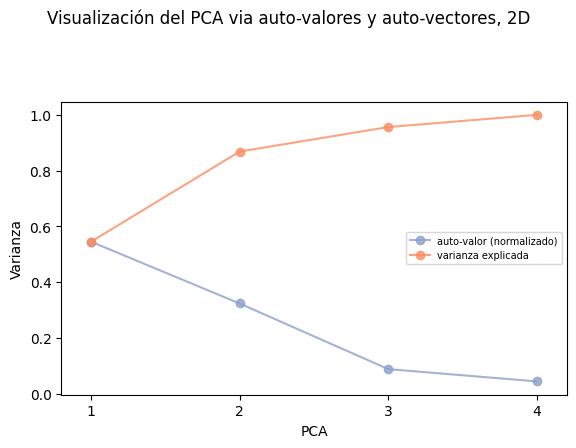

In [11]:
import matplotlib.pyplot as plt

plt.plot([1,2,3,4],
         w_normalized,
         '-o',
         color='#8da0cb',
         label='auto-valor (normalizado)',
         alpha=0.8,
         zorder=1000)

plt.plot([1,2,3,4],
         var_w_normalized,
         '-o',
         color='#fc8d62',
         label='varianza explicada',
         alpha=0.8,
         zorder=1000)

plt.xlim(0.8, 4.2)
plt.xticks([1,2,3,4])
plt.xlabel('PCA')
plt.ylabel('Varianza')
plt.legend(loc='center right', fontsize=7)
plt.grid(color='#fdfefe')


plt.suptitle(r'Visualización del PCA via auto-valores y auto-vectores, 2D')
plt.tight_layout(pad=3.0)
plt.show()    

___

## Parte 3

Como en el segundo gráfico del cuaderno visto en clase sobre PCA, grafique los tres mayores componentes principales utilizando la bibioteca **plotly** https://plotly.com/python/3d-scatter-plots/  **(10 puntos)**


___

In [16]:
import plotly.express as px

# Convert the last column to strings
T['category'] = T.iloc[:, -1].astype(str)

fig = px.scatter_3d(T, x='pc1', y='pc2', z='pc3', color='category', color_discrete_sequence=['blue', 'red'])
fig.show()
